# SLU13: Bias-Variance trade-off & Model Selection
---
<a id='top'></a>

Throughout the last units, you have seen how to process and analyze data and also learned about some different types of models - like `LinearRegression`, `LogisticRegression` and `DecisionTreeClassifier`. To use these models, you have defined some metrics to tell you how good or bad your model is performing.

In this unit, we'll go one step further and teach you how to analyze more deeply the performance of your models and use methods to select the best approach between different models and techniques. For this purpose, you first need to understand how model fitting works and what happens to the error of your model as you change its complexity. 

In this notebook we will cover the following:

1. [Bias-Variance trade-off](#biasvar)
2. [Generalization Error](#generror)
3. [Model Selection](#modelselection)
4. [Learning Curves](#learningcurves)



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils

import warnings
warnings.filterwarnings('ignore')

<a id='biasvar'></a>
[Return to top](#top)


# 1. Bias-Variance trade-off



Let's start with a simple problem. To do so, let's answer the following question: 

> **"How does the number of hours of TV per day relate to a person's age?"**

Load that dataset and plot it:


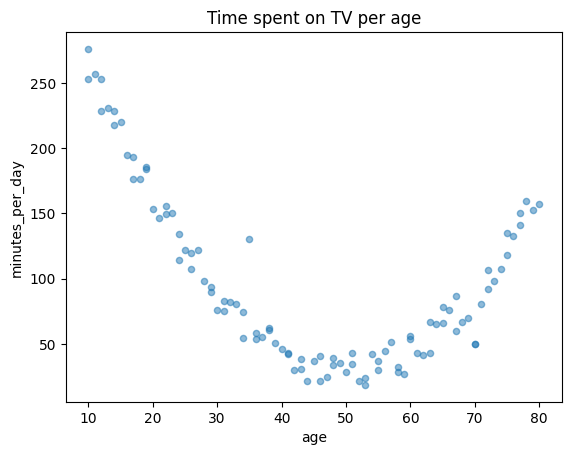

In [2]:
df = utils.generate_time_on_tv()

fig, ax = plt.subplots()
df.plot(kind='scatter', x='age', y='minutes_per_day', ax=ax, alpha=.5, title='Time spent on TV per age');

Great! We can notice there is a clear pattern here. We now want to create a model that predicts the expected time spent per day watching TV for a given age. Let's put some of what you've used in practice:

### High bias 

We will start by using a very "inflexible" model, the simple linear regression (linear regression with just one explanatory variable). Simple linear regression requires the answer be of the format:

$$ y = \beta x + c $$

Plotting a simple linear regression model trained on our dataset yields the following:

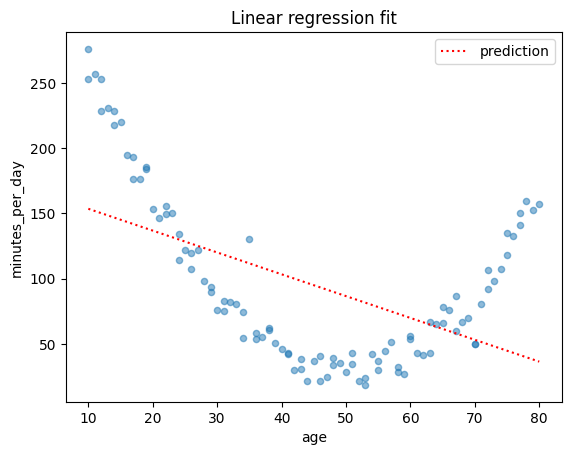

In [3]:
utils.fit_lin_reg(df)

This is no good! The reason is simple: our model had too many assumptions about the data ahead of time. It had too much **bias**.

In machine learning terms, we say that we've **underfit the data**. 

### High Variance
Now, in normal life the word "bias" has a negative connotation.

So if bias is bad, maybe we should get rid of as much bias as we can, and just let the data speak for itself! Right? Ehm... 

We'll use a really high variance algo *(don't worry about which one just yet)* and plot its output for the same dataset:

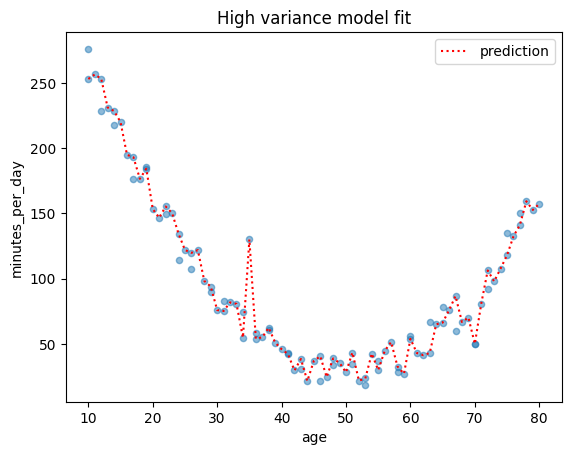

In [4]:
utils.fit_high_variance_algo(df)

Well that's no good either! The model just followed the data like an idiot, and doesn't seem to have any sort of assumptions about the data, or bias. We could say it has too much **variance**. ... oh wait that's what we wanted. (Do we though?) 

The learning here is... 

***Bias and Variance are a trade-off***

A bit of bias is necessary since not enough bias will make your model **overfit** to the data.

### Why does this matter?

The goal of building machine learning models is to be able to make accurate predictions on previously unseen data. In other words, we want the model to generalize, so that it can predict with confidence for unseen values:

* By having too much bias, the model does not "learn" enough to be accurate on seen (training) data or on unseen (test) data
* By allowing too much variance, the model may have high accuracy on training data, but it loses its power to generalize to unseen data. 


<a id='generror'></a>
[Return to top](#top)

# 2. Generalization Error

Understanding generalization error helps us quantify how well a machine learning model performs on unseen data. It encompasses bias, variance, and irreducible error. In this section, we will delve into each of these components and demonstrate their interplay and impact on model performance.

### Subtopics:
1. [**Decomposition**](#decompose)
    1. Bias
    2. Variance
    3. Irreducible error
2. [**Bias-variance trade-off**](#tradeoff)
3. [**Sources of complexity**](#complexitysources)

<a id='decompose'></a> [Top of section](#generror)

## 2.1. Decomposing the generalization error

The generalization error of a model can be broken down into three primary components:

- A. Bias
- B. Variance
- C. Irreducible error.

This decomposition aids in pinpointing the source of the error and subsequently refining the model. As we will see, dealing with bias and variance is really about under-fitting (high bias) and over-fitting (high variance).

![dart_throwing_bias_var_tradeoff](media/dart_throwing_bias_var_tradeoff.png)

<center><em>Fig.: Graphical illustration of bias and variance using dart-throwing, from <a href="http://scott.fortmann-roe.com/docs/BiasVariance.html">Scott Fortmann-Row's "Understanding the Bias-Variance Trade-off"</a></em></center>

### 2.1.A. Bias and underfitting

Bias stems from overly simplistic assumptions about the data. High bias can lead to underfitting, where the model is too rigid to capture the underlying patterns in the data. 

Bias is always learning the same wrong thing, skewing predictions consistently across different training samples (i.e., far-off from the real value):

$$ Bias = E\big[\hat{y} - y\big] $$

Fixing bias requires adding complexity to our models (usually meaning more parameters) to allow them to adapt better to the data. To reduce bias, we can take the following steps:

- Add more features: Including more relevant features can help the model capture the complexity of the data.
- Increase model complexity: Switching to a more complex model or increasing the parameters of the current model can help it fit the training data better.
- Reduce regularization: Regularization adds a penalty for more complex models. Reducing this penalty can allow the model to fit the data more closely.

### 2.1.B. Variance and overfitting

In contrast to bias, high variance arises when the model is excessively flexible, overreacting to the specifics of the training data (including the random noise).

Variance creeps in when we have more parameters than justified by the data and learn random things from different training samples:

$$ Variance = E\big[\big(\hat{y} - E[\hat{y}]\big)^2\big] $$

Fixing variance requires decreasing complexity to prevent the model from adapting too much to the training data. To reduce variance, we can:

- Add more training data: More data can help the model generalize better, reducing overfitting.
- Reduce model complexity: Simplifying the model or reducing the number of parameters can prevent it from fitting the training data too closely.
- Increase regularization: Regularization can help prevent the model from becoming too complex, thus reducing variance.
 
### 2.1.C. Irreducible error

Irreducible error is the portion of the error that cannot be eradicated regardless of the model's sophistication. It is a reflection of the inherent noise within the data.



<a id='tradeoff'></a> [Top of section](#generror)

## 2.2. Generalization error and bias-variance trade-off

The relationship between bias, variance, and model complexity is characterized by a trade-off. As model complexity increases, bias tends to decrease, while variance tends to increase, and vice versa.

![bias_variance_trade_off](media/bias_variance_trade_off.png)

<center><em>Fig.: The bias-variance trade-off, bias is reduced and variance is increased in relation to model complexity</em></center>

In theory, we reach the right level of complexity when the increase in bias is equivalent to the reduction in variance:

$$ \frac{dBias}{dComplexity} = - \frac{dVariance}{dComplexity} $$

In practice, *there is not an analytical way to find this location* and the more we (over)reach for signal, the greater the noise.

<a id='complexitysources'></a> [Top of section](#generror)

## 2.3. Sources of model complexity

Model complexity is influenced by various factors, such as the number of features and the nature of the relationship between variables. Examples of factors that contribute to model complexity include:

* adding new features: the more features we have, the more parameters we add to the model to combine these features. If you write up the equation of a linear model, for example, it should be evident that the number of weights (parameters) grows with the number of features:

$$ y = \beta_1 x_1 + \beta_2 x_2  + \beta_3 x_3  + \beta_4 x_4  + ... + c $$

* increasing the polynomial degree of the hypothesis: even when we have just one feature, increasing the order of the equation leads to a more complex model and, once again, with each order above the first one comes an increase in number of used parameters and a non-linear aspect:

$$ y = \beta_1 x + \beta_2 x^2  + \beta_3 x^3  + \beta_4 x^4  + ... + c $$

* using complex non-linearities: a lot of recent models introduce not only huge numbers of parameters but different ways of combining them in a non-linear way that increases the flexibility of the model. An example of this are the modern deep learning models used for very complex modern problems (such as image, language, etc) 



<a id='modelselection'></a>
[Return to top](#top)

# 3. Model Selection

Now that you know about the potentials of underfitting or overfitting your data, you need to find ways of assessing your models and avoiding these cases.

### Subtopics:

1. [**Offline evaluation**](#offlineeval)
    1. Leave-one-out or hold-out method
        1. [Hold out method](#traintestsplit)
        2. [In-sample or training error](#ise)
        3. [Out-of-sample or testing error](#ose)
        4. [Validation dataset](#valset)
    2. [K-Fold cross-validation](#kfolds)
    3. [Data leakage](#dataleak)
2. [**Practical considerations**](#practical)


<a id='offlineeval'></a> [Top of section](#modelselection)

# 3.1. Offline evaluation

We'll start by having a simple problem and apply the following method:

* use all of our data to fit a model
* assess with a metric - accuracy, in this case - the performance of our model

We will be using data about craft beer to try to predict whether a particular beer is an [India Pale Ale (IPA)](https://en.wikipedia.org/wiki/India_pale_ale).

The data was preprocessed in advance, as the original dataset was simplified and manipulated for teaching purposes. There are two features:
* `IBU`, which stands for International Bitterness Units and is a measure of bitterness
* `Color`.

![beer](media/beer.jpg)

In [5]:
data = pd.read_csv('data/beer.csv')
data.head(n=3)

,Color,IBU,IsIPA
0,-0.652164,-0.970233,0
1,-0.377297,1.387356,1
2,0.183752,0.442296,0


Let's get a quick idea of how the target (IsIPA) varies with the features: 

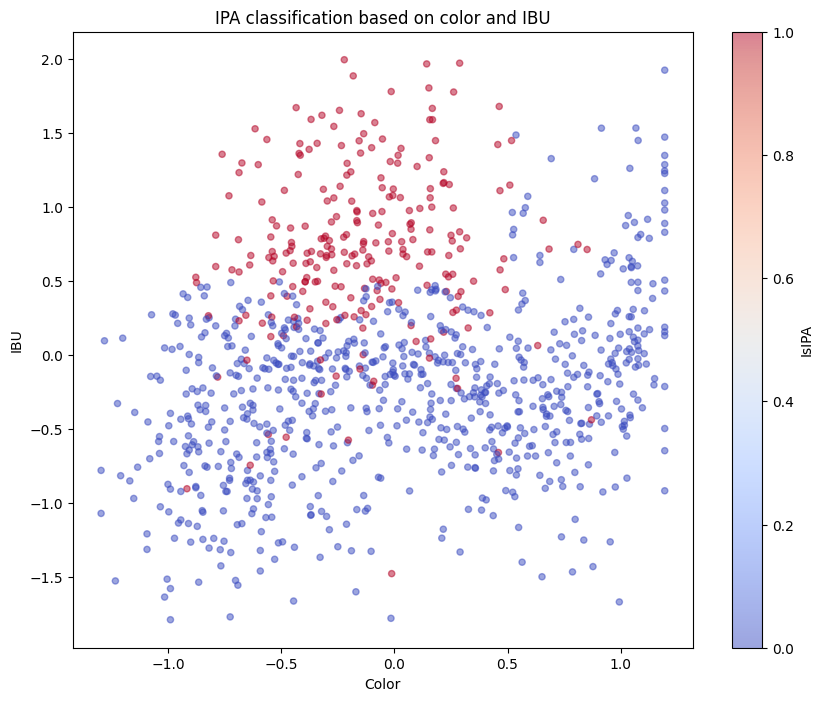

In [6]:
X = data[['Color', 'IBU']]
y = data['IsIPA']  # <--- to be an IPA or not to be an IPA, that is the question 

data.plot(kind='scatter', x='Color', y='IBU', c='IsIPA', colormap='coolwarm', figsize=(10, 8), alpha=.5, sharex=False)
plt.xlabel('Color')
plt.ylabel('IBU')
plt.title('IPA classification based on color and IBU')
plt.show()

We are going to try to model the type of beer (isIPA) by using `Color` and `IBU`. 

We will use 3 classifiers: 

> `SuperConservative` - a very simplistic model, which we expect to have **low variance** and **high bias**  
> `SuperFlexible` - a complex model that should have very **high variance**, and **low bias**   
> `WellBalanced` - a model that should be juuuust right 

And we'll compute the accuracy of each of our models to see which model is indicated as the best one

###  `SuperConservative` (high bias/low variance) 

For our `SuperConservative` model we will use a `Logistic Regression`. 

Logistic regression provides an example of bias because it makes a lot of assumptions about the form of the target function and will not be very sensible to the training data.

Visually, we can understand the model's inability to adjust to a non-linear decision boundary, structurally enforcing a linear one instead.

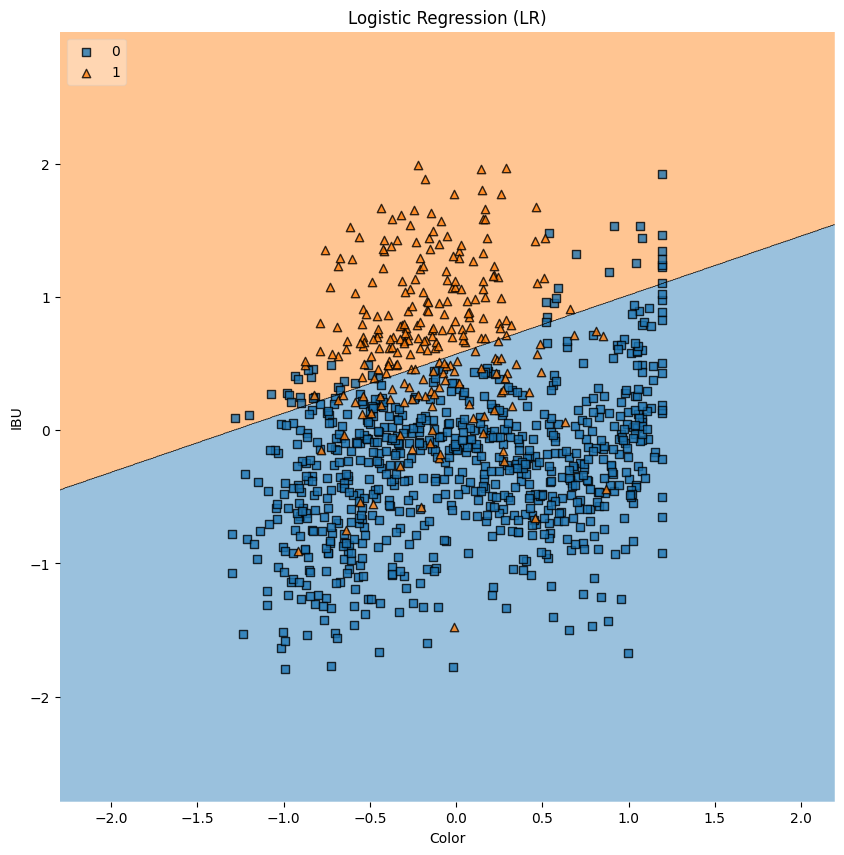

In [7]:
preds_super_conservative = utils.plot_super_conservative(X, y)

Let's check the accuracy too.

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
accuracy_score(y, preds_super_conservative)

0.88

It actually doesn't do too badly, but, when we look at the "right side" of our plot, we can tell that it probably should be blue all the way to the top, right? 

Let's give it tons of flexibility! 

### `SuperFlexible` (high variance)  

For our super flexible model, we will use a `k-Nearest Neighbors` with k=1 

The k-Nearest neighbors algorithm provides great flexibility and minimum underlying structure.

The small orange *pockets* or *islands* show that our model is over adapting to the training data and, most probably, fitting to noise.

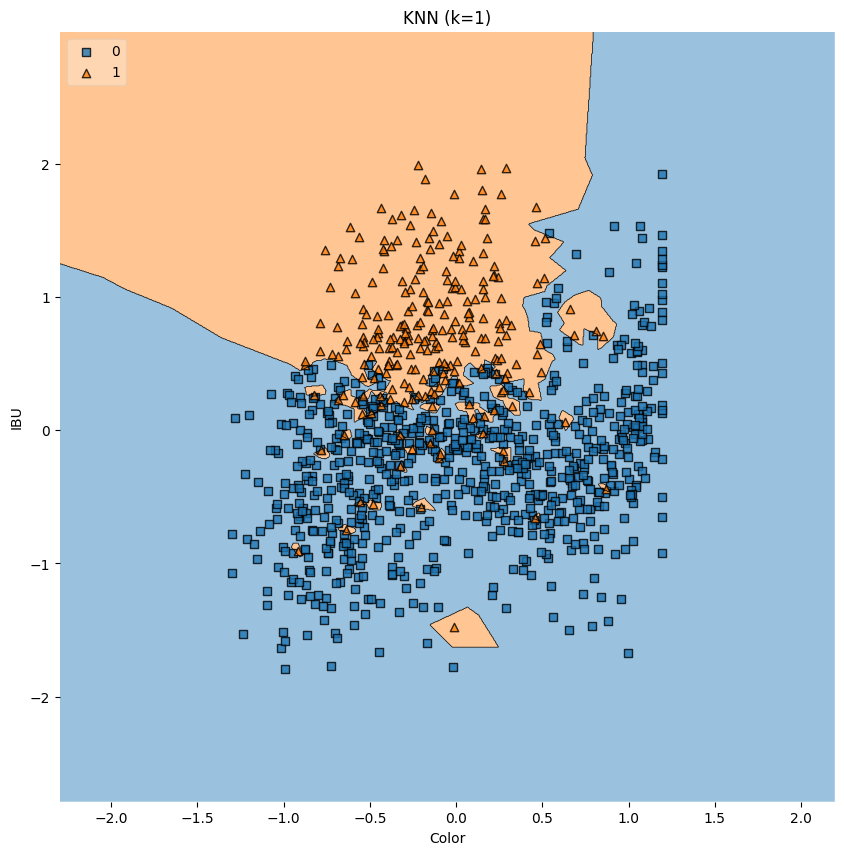

In [10]:
preds_super_flexible = utils.plot_super_flexible(X, y)

Oh. Right. It definitely figured out that the top right of the plot is blue, but it also did some pretty crazy things. It's pretty clear that it's fitting noise. 

What about the accuracy?

In [11]:
accuracy_score(y, preds_super_flexible)

1.0

It looks like the model has perfect accuracy, but when we look at the decision regions we know that this is not a "good" model. We will see how to reconcile these seemingly conflicting ideas in a bit.

### `WellBalanced` (sort of better)

For the well balanced one, we will use a `K-Nearest Neighbors` with k=9 

A key part of the k-NN algorithm is the choice of the hyperparameter *k*: the number of nearest numbers in which to base the prediction.

Increasing *k* results in considering more observations in each prediction and makes the model more rigid, for good effect.

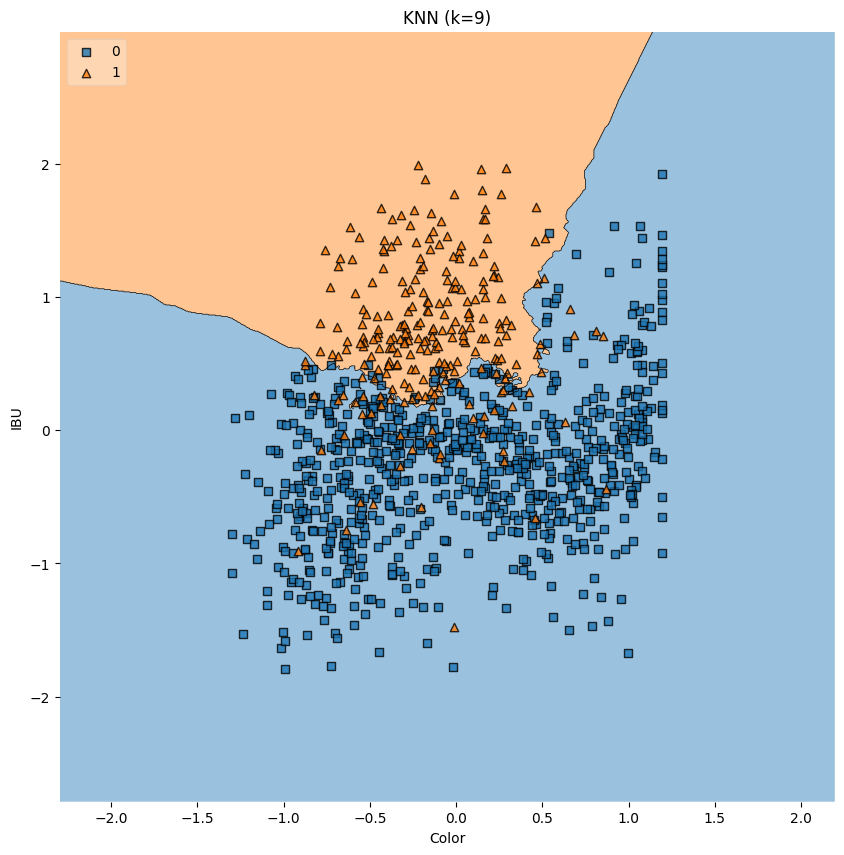

In [12]:
preds_just_right = utils.plot_just_right(X, y)

Accuracy:

In [13]:
accuracy_score(y, preds_just_right)

0.932

### So... how do we choose? 

The irony is that while the `SuperFlexible` model has perfect accuracy, it's not the "best" model by looking at the decision regions. There must be a better way! The need for validation arises from this contradiction.

### The need for validation

Given the above, we need to validate our models after training, to know if they are any good:
1. Our assumptions may not hold (that is, we trained a garbage model) or there may be better models
2. We may be learning parameters that don't generalize for the entire population (i.e., statistical noise).

Remember, our goal is to approximate the true, universal target function *f* and we need our model to be able to generalize to unseen data.

<a id='traintestsplit'></a> [Top of section](#modelselection)

## 3.1.A. Train-test split (holdout method)

The most obvious way to solve this problem is to separate your dataset into two parts: 
- the training set, where we will find out which model to use 
- the test set, where we will make sure we didn't just overfit the training set 

<img alt="hold_out_method" src="media/hold_out_method.png" width="400">

<center><em>Fig.: Train-test split</em></center>


Although there are other, more sophisticated approaches to measuring generalization power of machine learning models, from a basic data science perspective, having a held-out test set that is only used at the end of the process is one of the most sacred concepts. 

Someone brilliant (and whose name I can't recall) once said: 
> _**"Every time you use your test set your data dies a little"**_

That is because every time you use your test set you lose the ability to tell whether you are overfitting the data you happen to have at hand. 

<a id='ise'></a> [Top of section](#modelselection)

### In-sample-error (ISE) or training error


The in-sample-error is how well our model performs on the training data.

We will measure the error rate for each model in the simplest way, by computing the fractions of misclassified cases.

Remember our 3 classifiers? Let's calculate the in-sample-error for each: 

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

clfs = {'SuperConservative': LogisticRegression(),
        'WellBalanced': KNeighborsClassifier(n_neighbors=9),
        'SuperFlexible': KNeighborsClassifier(n_neighbors=1)}

In [15]:
def classification_error(clf, X, y):
    y_pred = clf.predict(X)
    error_rate = 1 - accuracy_score(y, y_pred)
    return round(error_rate * 100, 2)

We will make the first 800 rows (80%) training data 

In [16]:
X_train = X[:800]
y_train = y[:800]

We will make the last 200 rows (20%) test data  

In [17]:
X_test = X[800:]
y_test = y[800:]

Testing our model's performance on the training data is a common mistake and underestimates the generalization error.

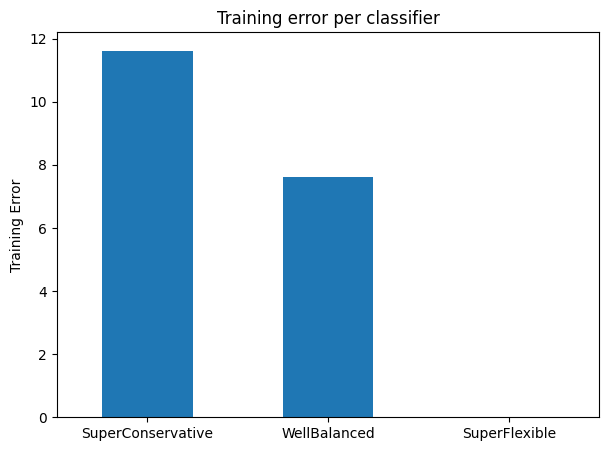

In [18]:
training_error = {}
for key, clf in clfs.items():
    clf.fit(X_train, y_train)
    training_error[key] = classification_error(clf, X_train, y_train)

pd.Series(training_error).plot(figsize=(7, 5), kind='bar', rot=0)
plt.ylabel('Training Error')
plt.title('Training error per classifier')
plt.show()

I mean, clearly the `SuperFlexible` model is the best one! Right? (wrong, as we've seen before).

Next, we'll measure the out of sample error of each of the models. 

<a id='ose'></a> [Top of section](#modelselection)

### Out-of-sample error (OSE) or testing error

The out-of-sample error measures how well the model performs on previously unseen data and if it's picking up patterns that generalize well.

The ideal scenario is when both training and test errors are low and close to one another.

* *Underfitted* models tend to perform poorly on both train and test data, having large (and similar) in-sample- and out-of-sample errors.

* *Overfitting* is detected when a model performs well on training data but not quite so well in the test set: the bigger the gap, the greater the overfitting.

![train_test_error](media/train_test_error.png)
<center><em>Fig.: How training and test errors behave in regards to model complexity, bias and variance</em></center>
<br/>

But okay, let's see how our models perform on the test set.

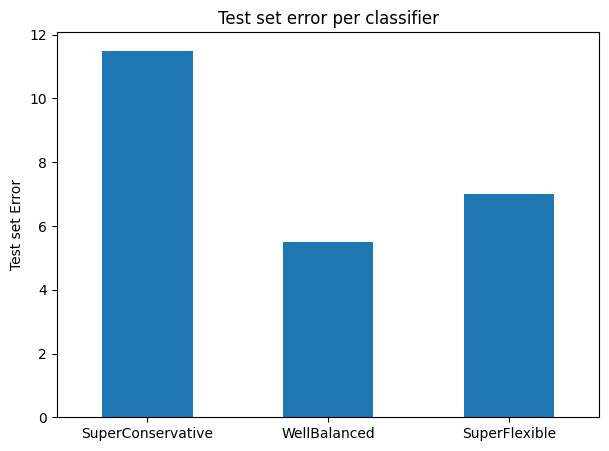

In [19]:
test_set_error = {}
for key, clf in clfs.items():
    test_set_error[key] = classification_error(clf, X_test, y_test)

pd.Series(test_set_error).plot(figsize=(7, 5), kind='bar', rot=0)
plt.ylabel('Test set Error')
plt.title('Test set error per classifier')
plt.show()

We can now see that the `SuperFlexible` model actually performs worse in data that the model hasn't seen! This matches what we've seen in the plots.

So the first big guideline you should take from this is: **Always evaluate your model on a separate set of data that it has never seen**. This set - called **test set** - will produce a more accurate metric - our **testing error** - which will be the base to perform proper model selection.

As mentioned before, within this general approach there are different techniques to measure the testing error. We will focus on:

1. Train-test split
2. Validation set
3. Cross-validation.

### Train-test split (aka holdout method)

The simplest solution is to leave a random subset of the data aside from the beginning to test our final model at the end.

![test_set](media/test_set.png)

<center><em>Fig.: Test set illustrated, you holdout a significant chunk of the data for testing your model in the end</em></center>


![train_test_set](media/train_test_split.png)

<center><em>Fig.: Workflow with test and training sets</em></center>

After evaluation, you should retrain your final chosen model on the whole dataset.

Scikit-learn has some amazing functionality to help you with model selection. Here, we are importing a data scientist's best friend, `train_test_split`. This function randomly assigns data points to the train or test set.

In [20]:
from sklearn.model_selection import train_test_split

# You can specify the percentage of the full dataset you want to reserve for testing, here we are using 40%
# Setting the random state fixes the randomness of train/test split so the sets are reproducible 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(f"---\nNumber of observations:\nTrain: {X_train.shape[0]} | Test: {X_test.shape[0]}")

---
Number of observations:
Train: 600 | Test: 400


Now, we will compute the classification error on both the train and test sets for each model.

In [21]:
def compute_metrics(X_train, y_train, X_test, y_test, clf):
    training_error = classification_error(clf, X_train, y_train)
    test_error = classification_error(clf, X_test, y_test)
    return training_error, test_error

for key, clf in clfs.items():
    clf.fit(X_train, y_train)
    training_error, test_error = compute_metrics(X_train, y_train, X_test, y_test, clf)
    print(f'---\n{key} error:\nTrain: {training_error}% | Test: {test_error}%')

---
SuperConservative error:
Train: 12.33% | Test: 11.5%
---
WellBalanced error:
Train: 7.17% | Test: 7.75%
---
SuperFlexible error:
Train: 0.0% | Test: 12.75%


To quickly recap, SuperConservative has high bias and has both high train and test error. It is underfit.

SuperFlexible has high variance and has low train but high test error. It is overfit.

WellBalanced has a balance of bias and variance and has relatively low train and test error. It is well-fit.

<a id='valset'></a> [Top of section](#modelselection)
### Validation set

After exploring the train-test split method, you might be wondering if there's a way to further optimize our model's performance. This brings us to the concept of a *validation dataset*. 

While the train-test split gives us a good estimate of our model's out-of-sample error, a validation set can be used to fine-tune the model's hyperparameters before we make our final evaluation. This extra step can be crucial in achieving the best possible model performance. Let's delve deeper into how we can effectively utilize a validation set, given we have enough data.

![validation_set](media/validation_set.png)

<center><em>Fig.: Validation set as compared with the holdout approach</em></center>

<br/>

![validation_split](media/validation_split.png)

<center><em>Fig.: Workflow with test, validation and training sets</em></center>
<br/>


To create a validation set and a test set, we use `train_test_split` twice! For this example, we will use a 60-20-20 split for the train, validation, and test sets, respectively.

In [22]:
# First separate how much data you want to reserve for val + test, we are using 40% again
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1234)
# Then separate the temporary val + test set, typically they are the same size so we are using 50%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=1234)
del X_temp, y_temp

print(f"Number of observations:\nTrain: {X_train.shape[0]} | Test: {X_test.shape[0]} | Validation: {X_val.shape[0]}")

Number of observations:
Train: 600 | Test: 200 | Validation: 200


Now we will compute the classification error on the train, validation, and test sets for each model.

In [23]:
def compute_validation_metrics(X_train, y_train, X_test, y_test, X_val, y_val, clf):
    training_error, test_error = compute_metrics(X_train, y_train, X_test, y_test, clf)
    validation_error = classification_error(clf, X_val, y_val)
    return training_error, test_error, validation_error

for key, clf in clfs.items():
    clf.fit(X_train, y_train)
    training_error, test_error, validation_error = compute_validation_metrics(
                                        X_train, y_train, X_test, y_test, X_val, y_val, clf)
    print(f'---\n{key} error:\nTrain: {training_error}% | Validation: {validation_error}% | Test: {test_error}%')

---
SuperConservative error:
Train: 13.17% | Validation: 10.0% | Test: 10.0%
---
WellBalanced error:
Train: 7.33% | Validation: 7.5% | Test: 7.5%
---
SuperFlexible error:
Train: 0.0% | Validation: 13.5% | Test: 10.0%


You might be wondering, how is this validation set different from the test set? Don't we basically just have two test sets?

Typically, a validation set will be used to tune hyperparameters of the model, and then final evaluation of OSE will be done on the test set. 

To demonstrate this, we will use the validation set we created above to find the optimal value of the hyperparameter *k* for our KNN classifier. 

Again, don't worry about what this means exactly, just know that, with increasing *k*, the model becomes less flexible.

In [24]:
# store the errors
error_dict = {}
# store the classifiers so we can retrieve the best one later
clf_dict = {}
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_error, validation_error = compute_metrics(X_train, y_train, X_val, y_val, knn)
    error_dict[k] = {'train_error': train_error, 'validation_error': validation_error}
    clf_dict[k] = knn

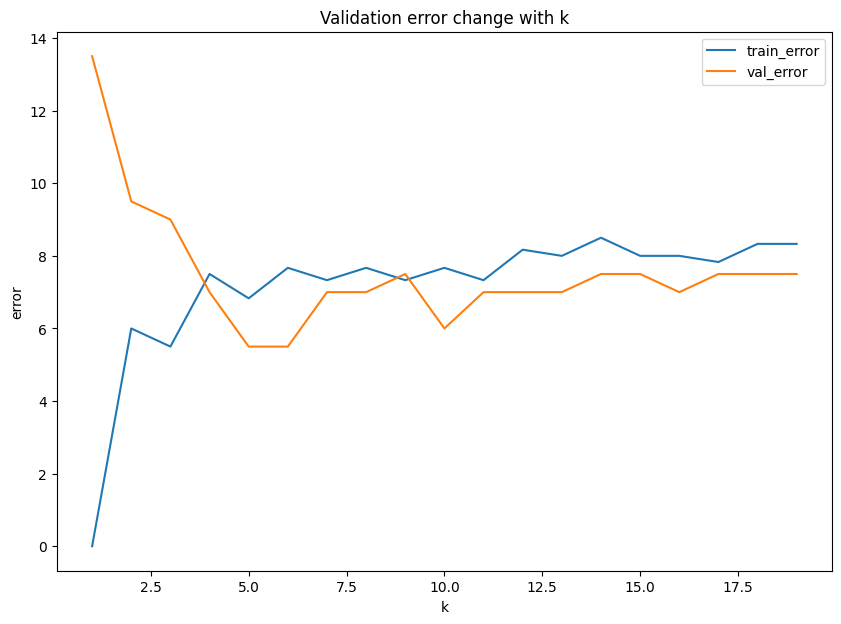

In [25]:
plt.figure(figsize=(10,7))
plt.plot(list(error_dict.keys()), [d['train_error'] for d in error_dict.values()], label='train_error')
plt.plot(list(error_dict.keys()), [d['validation_error'] for d in error_dict.values()], label='val_error')
plt.title('Validation error change with k')
plt.xlabel('k')
plt.ylabel('error')
plt.legend();

Judging by the graph, it looks like `k=5` is actually the best! Now we will use this value for *k* when evaluating the test set.

In [26]:
knn_5 = clf_dict[5]
test_error = classification_error(knn_5, X_test, y_test)
print(f'KNN, k=5 error:\nTrain: {error_dict[5]["train_error"]}% | Validation: {error_dict[5]["validation_error"]}% '\
      f'| Test: {test_error}%')

KNN, k=5 error:
Train: 6.83% | Validation: 5.5% | Test: 6.0%


This is pretty cool! We were able to tune the parameter *k* on our validation set, and the OSE (test error) actually dropped from the `WellBalanced` (k=9) model we trained before!

<a id='kfolds'></a> [Top of section](#modelselection)
## 3.1.B. k-Fold Cross-validation

Test error results can be subject to great variability, especially for smaller datasets, depending on how we split the data (i.e., which observations go to train and which go to val/test).

Also, and quite obviously, holding out *more* data reduces the amount available for training, possibly leading us to *overestimate* the test error.

One way to mitigate this is to use ***k*-fold cross validation.**

In *k*-fold cross validation:
1. The original sample is randomly partitioned into *k* equal sized parts, or subsamples

2. Each time, we leave out part *k*, fit the model to the other *k*-1 subsets combined in a single dataset, and then test the model against the left out *k*-th part

3. This is done for each *k* = 1, 2, ..., *K*, and then the results are combined, using, for example, the mean error.

![cross_validation](media/cross_validation.png)

<center><em>Fig.: Creating multiple (K=5) train and test set pairs using cross-validation</em></center>
<br/>

This way, we use every observation to both train and test out model: each fold is used once as validation, while the *k*-1 remaining folds form the training set.

The mean of the error of every fold can be seen as a proxy for OSE.

Again, scikit-learn already has cross validation implemented for us!

In [27]:
from sklearn.model_selection import cross_val_score

for key, clf in clfs.items():
    # We can specify the number of folds we want with cv
    scores = cross_val_score(clf, X, y, cv=10, scoring=classification_error)
    mean_error = round(np.mean(scores), 2)
    var_error = round(np.var(scores), 2)
    print(f'---\n{key} validation error:\nMean: {mean_error}% | Variance: {var_error}')

---
SuperConservative validation error:
Mean: 12.0% | Variance: 7.4
---
WellBalanced validation error:
Mean: 8.0% | Variance: 8.8
---
SuperFlexible validation error:
Mean: 12.0% | Variance: 11.2


Nonetheless, since each training set contains just part of the data, the estimated test error can still be biased upward.

<a id='dataleak'></a> [Top of section](#modelselection)

## 3.1.C. Data Leakage

Data leakage occurs when information from outside the training dataset is used to create the model, resulting in a model that is not truly representative of the real world and could potentially give overly optimistic performance estimates. This typically happens when knowledge about the test set leaks into the training process, which could include data preprocessing, feature engineering, and model training.

For example, imagine you are building a model to predict which bamboo forests pandas will migrate to based on environmental conditions. If your model accidentally has access to future data about where pandas actually migrated, it will perform exceptionally well during testing, but it will likely fail in real-world scenarios because it used future information it should not have had.

To prevent data leakage, we must strictly keep the test data separate from the training data during the entire modeling process. Data leakage can be hard to detect, but if your results seem a little too good to be true, that's one sign. Ways to combat data leakage include:

* Perform data preparation within your cross validation folds
* Hold back a test dataset for final sanity check of your developed models

<a id='practical'></a> [Top of section](#modelselection)
# 3.2. Practical considerations

In addition to choosing models based on their performance, there are practical considerations that data scientists need to  factor into model selection. It is important to always keep your business case in mind and consider if factors like speed and memory usage are more important than that extra 0.1% in accuracy. 

### Training time

* Sometimes the "best" models can take a long time to train (for certain deep learning models, it can be as long as a few days or weeks)
  * We need to consider if the business case warrants waiting this long for results
* It is best practice to work towards a quick baseline, or **MVP** (Minimum Viable Product), with a simple model, and then iterate to improve it
  * Oftentimes a simple model will be quick to train and still yield decent performance
  * Furthermore, if your data is noisy, or if there is too much irreducible error, the most complex and advanced models will not be able to "learn" much more than a simple model anyway. So, it is better to try something quick before wasting time trying to train a complex model just to find out there is too much noise
  
### Prediction time

* The time your model takes to return predictions is also very important, especially in production environments
* Again, you need to consider your use case and decide what prediction time is reasonable (i.e., do you need real-time predictions??)
  * You can have a near-perfect model, but if it takes 30 seconds to return a prediction for one sample, a slightly worse model that takes 0.1 seconds for prediction might be better
  
  
### Memory (and $$$)

* Some complex models (again, deep learning models are a good example) occupy a lot of disk space and/or require a large amount of memory (RAM)
  * These factors not only play into prediction time but can translate to actual costs for your business
  * Training and then serving heavy models in production may require more expensive machines that can impact margins!


### Baselines and starting simple

Usually in the process of solving a problem through data science, you start by building a first simple model to get an idea of the overall performance to expect from the task. You will learn more about this in SLU17, but usually we call this a **baseline**. This baseline acts as an initial performance indicator and can help you look into the errors and understand more about the task. 

A good rule of thumb to avoid running into issues and doing proper model selection is to start simple, that is, avoid starting with overly complex models for your baseline.




<a id='learningcurves'></a>
[Return to top](#top)

# 4. Learning Curves


Now that you know how to properly evaluate a model and select the best hypothesis, let's delve into how to optimally utilize your dataset. Imagine you have access to a vast amount of data and find yourself contemplating:

> How much data should we use for training?

The obvious starting point about which data to use is... "why not just all of it?"

However, this is not always the best approach, and there are a few possible scenarios where it may actually be a pretty bad idea:

1. **Modeling Efficiency:** Excessive data can significantly slow down the modeling process.
2. **Data Acquisition Costs:** Obtaining data can be costly.
3. **Sample Bias:** Your dataset might exhibit sample bias, failing to accurately represent the population.
4. **Data Redundancy:** Your model might not benefit from additional data beyond a certain point.

For example, if you have terabytes of data, your model might plateau in performance after processing just the first 100MB. Investing time and resources in extended training might not yield proportional benefits. Knowing if your model has "converged" will help with this.

One question we don't run into in Academia, but quickly run into in Industry, is that data is expensive to acquire, and you need to know if you have enough. If you are training a model to distinguish between different types of birds, getting training data may be expensive, and a legitimate question may be _"do we have enough data, or do we need to send Paul to south america with a camera again?"_

Moreover, sample bias can be a critical factor. In a medical application, your model might improve with more examples of one gender but not the other. Or, in election modeling, if most of your survey respondents are over 50, but the actual average age of voters is 30, you might need to adjust your dataset to reflect reality.

To navigate these complexities, we can utilize learning curves, a powerful tool offered by scikit-learn under `sklearn.model_selection.learning_curve`. A learning curve plots the performance of a classifier across different dataset sizes, helping you discern the point of diminishing returns in adding more data.

![learning_curve_error](media/learning_curve_error.png)

<center><em>Fig.: An example of a learning curve plot with training score (blue) and cross-validation test score (green), from <a href="https://www.dataquest.io/blog/learning-curves-machine-learning/">Alex Olteanu's "Tutorial: Learning Curves for Machine Learning in Python"</em></center>
<br/>

What you are looking for is a place where the training and cross-validation scores stabilize in good values. After that dataset size, you are not gaining much more value from increasing the amount of data.

But enough chitchat, let's look at some learning curves! 

#### Let's use a very, very deep Decision tree and see if we can spot the overfit 

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

dt = DecisionTreeClassifier(max_depth=200,       # go as far as you like 
                            min_samples_leaf=2)  # and just keep 2 samples in each leaf

And now... the learning curve! 

**Note**: Unlike in the image before, in these learning curves we're using the ROC-AUC (Receiver Operating Characteristic - Area Under Curve) score, where higher is better, and the train and test curves are therefore in opposite positions 

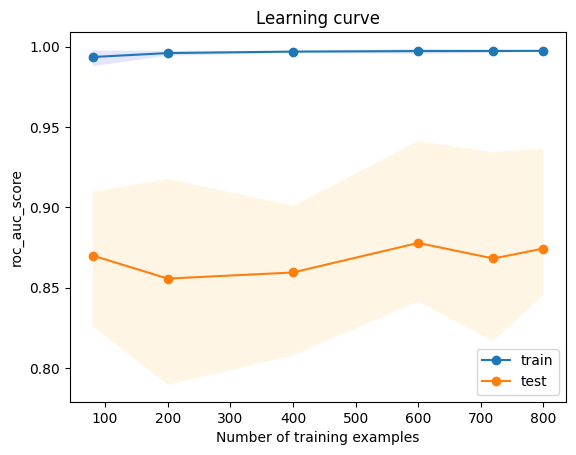

In [29]:
lc = learning_curve(    
    estimator=dt,
    X=X,
    y=y,
    train_sizes=[0.1, 0.25, 0.5, 0.75, 0.9, 1], # the sizes to try
    cv=5,                                        # how many cross validation folds 
    scoring='roc_auc',                           # what metric we care about 
    n_jobs=-1,
    shuffle=True,
    random_state=1000,
    return_times=True,                           # whether we want to know the train times
)

# The learning curve returns lots of things, so let's unpack them here
train_sizes_abs = lc[0]
train_scores =    lc[1]
test_scores =     lc[2]
fit_times =       lc[3]
score_times  =    lc[4]

# note: this function is custom for this learning unit, but feel free to use it  
utils.plot_learning_curve(train_sizes_abs, train_scores, test_scores)

Spend a couple of minutes looking at the chart, and the axis labels. 

This is an example where the training score is always extremely high, but the test score is not that great. We can suspect that it simply made "paths" for each example in the training set, and while some of those worked in the tests set, it was never that great. 

Now for the exact same thing, but forcing the tree to have at least 30 examples in each leaf

In [30]:
dt = DecisionTreeClassifier(max_depth=200,       # go as far as you like 
                            min_samples_leaf=30) # but now you need 30 samples 

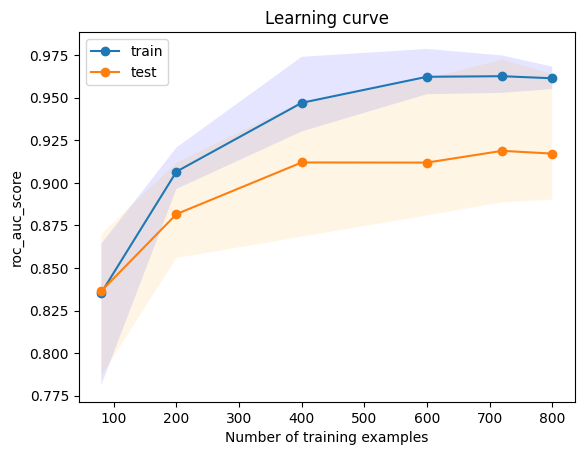

In [31]:
lc = learning_curve(    
    estimator=dt,
    X=X,
    y=y,
    train_sizes=[0.1, 0.25, 0.5, 0.75, 0.9, 1], # the sizes to try
    cv=5,                                        # how many cross validation folds 
    scoring='roc_auc',                           # what metric we care about 
    n_jobs=-1,
    shuffle=True,
    random_state=1000,
    return_times=True,                           # whether we want to know the train times
)

# The learning curve returns lots of things, so let's unpack them here
train_sizes_abs = lc[0]
train_scores =    lc[1]
test_scores =     lc[2]
fit_times =       lc[3]  # we won't show example of training time because the dataset 
score_times  =    lc[4]  # is so tiny, but you can check these out for yourself 

utils.plot_learning_curve(train_sizes_abs, train_scores, test_scores)

That's a lot better! The training score is never perfect, but the test score follows it quite closely. 

How about a Gradient Boosting Classifier? 

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gcb = GradientBoostingClassifier(max_depth=3, min_samples_leaf=40)

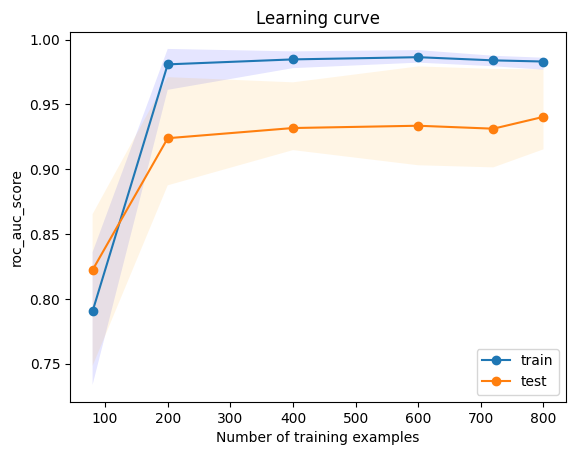

In [33]:
lc = learning_curve(    
    estimator=gcb,
    X=X,
    y=y,
    train_sizes=[0.1, 0.25, 0.5, 0.75, 0.9, 1], # the sizes to try
    cv=5,                                        # how many cross validation folds 
    scoring='roc_auc',                           # what metric we care about 
    n_jobs=-1,
    shuffle=True,
    random_state=1000,
    return_times=True,                           # whether we want to know the train times
)

# The learning curve returns lots of things, so let's unpack them here
train_sizes_abs = lc[0]
train_scores =    lc[1]
test_scores =     lc[2]
fit_times =       lc[3]
score_times  =    lc[4]

utils.plot_learning_curve(train_sizes_abs, train_scores, test_scores)

Here we actually see an interesting thing, which is that the classifier had (mostly) stabilized after a few hundred training examples. If examples were really expensive to come by, we may confidently say that we don't need to get any more, as the classifier has converged. 

-------

Thank you for finishing this learning notebook! Hopefully you now have a better idea of 
1. How to choose the best models, optimizing for both bias and variance and keeping practical considerations in mind
2. Different techniques to separate your data into train and validation/test sets, and the benefits and drawbacks of each
3. What is overfitting, why it's bad, and some ways to combat it with evaluation techniques
4. What is a learning curve, how to plot it and interpret it 

So go check out the exercise notebook! 